# Inverse mapping 

This tutorial shows a script that applies a geometric transformation (i.e., warping) on an image. The image in this tutorial is a square shape on a black background. The transformation shown is a rotation but we could use any transformation. Because we are transforming images, we need not only to warp the coordinates of the destination image but also to transfer the color of the pixels from the original image to the transformed image. This transfer of colors is done by means of an inverse-mapping procedure.    

This example was partially adapted from: 
http://scipy-lectures.github.io/advanced/image_processing/


In [42]:
# Ensures ipython shows images and results in line instead of all at the end of the notebook. 
%matplotlib inline

In [43]:
# Import all libraries that we will use
from scipy import ndimage
from scipy import misc
import imageio 
import matplotlib.pyplot as plt
import numpy  as np
import PIL

In [44]:
#--------------------------------------------------------------# 
# Checks boundaries of matrix 
#--------------------------------------------------------------#
def isWithinBoundaries(x, y, nRows, nCols):
    # Return True if (x,y) is within the boundaries of matrix A(nRows,nCols)    
    return (x>=0 and x<N and y >= 0 and y < M)

In [45]:
#--------------------------------------------------------------# 
# Performs inverse mapping 
#--------------------------------------------------------------#
def inverseMapping(u, v, theta):
    # Rotation transformation 
    x = u * np.cos(theta) - v * np.sin(theta)
    y = u * np.sin(theta) + v * np.cos(theta)

    return x,y

## Create source image 
Create and display a synthetic image of a yellow square centered on a black background. Matrix elements are of float type. 

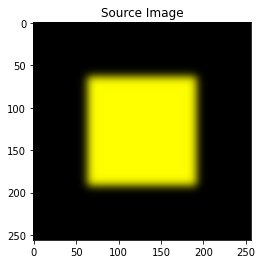

In [46]:
M = 256; N = 256;         # M: Number of rows, N: Number of columns.  
src_im = np.zeros((M, N, 3), dtype='f')

xo = 64; yo = 64; dx = dy = 128;            # Top-left corner of square and its sizes                 

# Initialize the region of the rectangle (yellow = red + blue) 
src_im[yo:yo+dy, xo:xo+dx, 0] = 1.0         # Red component                            
src_im[yo:yo+dy, xo:xo+dx, 1] = 1.0         # Green component        
src_im[yo:yo+dy, xo:xo+dx, 2] = 0.0         # Blue component      

# Blur the shape by applying a Gaussian filter to all channels. Smoothing the 
# value this way simulates a real image.  
src_im[:,:,0] = ndimage.gaussian_filter(src_im[:,:,0], 5.0)     
src_im[:,:,1] = ndimage.gaussian_filter(src_im[:,:,1], 5.0)     
src_im[:,:,2] = ndimage.gaussian_filter(src_im[:,:,2], 5.0)     

# Display source image 
plt.figure(1)
plt.imshow(src_im)
plt.title('Source Image')
plt.show()

In [47]:
# Save original matrix as a png image          
#misc.imsave('Square.png', src_im) # uses the Image module (PIL)
imageio.imwrite('Square.png', src_im.astype(np.uint8))


# Create a new matrix to hold another image. This new image will hold the result 
# of the transformation. 
dst_im = np.zeros((M, N, 3), dtype='f')

theta = np.pi/8.0             # Rotation angle   

## Inverse-mapping loop 
To apply the inverse mapping to images, we need to transfer the color of pixels from the source image to the destination image. To do that, we loop over the destination image matrix, which we assume is indexed by $(u,v)$ coordinates. The original image is assumed to be in $(x,y)$ coordinates. For each pixel location $(u,v)$ in the destination image, we calculate the inverse transformation, which gives us a location $(x,y)$ in the original image.

In [48]:
for v in range(0,M):
    for u in range(0,N):
        
        # Map the current location on the destination image to the 
        # corresponding location of the original image
        x,y = inverseMapping(u, v, theta)

        # Set the color of (u,v) location to the color of (x,y) location if 
        # (x,y) are valid coordinates.
        if isWithinBoundaries(x, y, M, N): 
            dst_im[v,u,0] = src_im[int(y),int(x),0]    # red component
            dst_im[v,u,1] = src_im[int(y),int(x),1]    # green component
            dst_im[v,u,2] = src_im[int(y),int(x),2]    # blue component 
         
         

## Display resulting image 

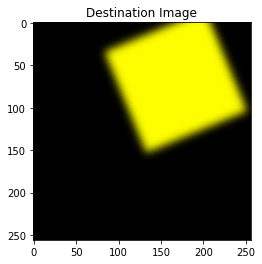

In [49]:
# Display image 
plt.figure(2)
plt.imshow(dst_im)
plt.title('Destination Image')
plt.show()

In [50]:
          
# Save rotated matrix as a png image          
imageio.imsave('rotatedSquare.png', dst_im.astype(np.uint8)) # uses the Image module (PIL)